# Estudo de Caso

Este documento refere-se ao estudo de caso solicitado pela empresa Sesi como etapa final do processo seletivo para o cargo de Inovação em Saúde e Segurança para as Indústrias, com ênfase na Área de Dados.


Atividades necessárias:

- Integração das Bases de Dados: Vincular as informações dos pacientes nas três bases, utilizando identificadores únicos ou outros métodos adequados.

  
- Análise de Correlação: Empregar técnicas de análise estatística para identificar correlações entre variáveis alimentares (por exemplo, consumo de nutrientes específicos, padrões alimentares) e indicadores de saúde mental (por exemplo, sintomas de depressão, ansiedade, estresse)

  
- Visualização de Resultados: Apresentar os resultados da análise de forma clara e concisa, utilizando gráficos, tabelas ou outras ferramentas de visualização de dados.


- Interpretação e Discussão: Discutir os resultados obtidos, considerando a significância estatística, as possíveis relações causais entre alimentação e saúde mental, e as implicações para a prática clínica.

  
- Limitações e Recomendações: Identificar as limitações do estudo, como potenciais vieses ou fatores não considerados, e propor novas pesquisas para aprofundar o conhecimento sobre a relação entre alimentação e saúde mental.ntal.

# Bibliotecas

Neste estudo de caso utilizaremos algumas bibliotecas do python para auxiliar o processo de análise de dados, sendo elas:

- **Pandas:** Manipulação e estruturação de dados.
- **Datetime:** Alterar valores não datetime para datetime
- **Re:** Aplicar expressoes regulares
- **Warnings:** Ignorar avisos
- **Seaborn:** Visualização
- **MatplotLib:** Graficos / Visualização
- **NLTK:** Linguagem Natural
- **WordCloud:** Nuvem de palavras

In [1]:
# Imports

import pandas as pd
from datetime import datetime
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Datasets

df_pacientes = pd.read_excel('Estudo de Caso/Pacientes.xlsx')
df_nutri = pd.read_excel('Estudo de Caso/DatabaseNutri.xlsx')
df_psico = pd.read_excel('Estudo de Caso/DatabasePsico.xlsx')

In [3]:
# Função

def remover_emoticons(texto):
    return re.sub(r'[🚨✔️⚠️]+', '', texto)

# Base de Dados

Serão tratados três base de dados em formato xlsx (Excel), nomeadas: Pacientes, DatabasePsico, DatabaseNutri.

- Pacientes: Contém informações sobre os pacientes.
- DatabaseNutri: Contém informações sobre os atendimentos realizados no serviço de nutrição.
- DatabasePsico: Contém informações sobre os atendimentos realizados no serviço de psicologia.

Cada base de dados possui 2 eixos (linhas e colunas) e diferentes nomes de colunas.

## Pacientes:

- **id_empresa:** id da empresa vinculada ao paciente
- **id_unidade:** id da unidade vinculada ao paciente
- **id_paciente:** id do paciente
- **Setor:** Setor ao qual o paciente atua
- **Função:** Qual cargo do paciente
- **Turno:** Turno ao qual o paciente trabalha
- **Sexo:** Qual sexo que o paciente se declara
- **Patologias Crônicas:** Doenças duradouras
- **Patologias Agudas:** Doenças de pouca duração
- **id_profissional:** Profissional que realizou atentimento
- **CPF:** CPF do paciente
- **Altura:** Altura do paciente
- **Nascimento:** Data de nascimento do paciente
- **Admissão:** Data de admissão na empresa
- **Criado:** Data da realização do atendimento
- **FezTerapia:** Se o paciente realizou terapia
- **OndeFezTerapia:** Local da terapia
- **Migração:** Se mudou de setor
- **Criado por:** Profissional que realizou a inserção do dado no documento
- **Status de liberação:** Se foi liberado ou não
- **Tipo de Item:** Qual tipo do item
- **Caminho:** Caminho do documento

## DatabaseNutri:

- **id_empresa:** id da empresa vinculada ao paciente
- **id_unidade:** id da unidade vinculada ao paciente
- **id_paciente:** id do paciente
- **id_profissional:** Profissional que realizou atentimento
- **SubDate:** Subdata da realização do atendimento
- **Data:** Data da realização do atendimento
- **Sintoma_Principal:** Principal sintoma ao qual o paciente reclama
- **Comparecimento:** Se o paciente compareceu ao atendimento ou não
- **Peso:** Peso do paciente
- **CA:** Circunferência Abdominal do paciente
- **CC:** Circunferência Cintura do paciente
- **Objetivo:** Qual o objetivo que o paciente deseja alcançar
- **Estagio:** Em qual estágio o paciente está para alcançar seu objetivo
- **Funcionamento_Intestinal:** Como o paciente identifica seu intestino (Regulado, preso ou solto)
- **Fome_Emocional:** Fome baseada em estimulos emocionais
- **Sono:** Se o paciente possui sono regulado
- **Atividade_Fisica:** Atividades fisicas realizadas pelo paciente
- **Frequencia_AF:** Frequência a qual o paciente realiza as atividades fisicas
- **Frequencia_Fruta:** Frequência a qual o paciente digere frutas
- **Frequencia_Verdura:** Frequência a qual o paciente digere verduras
- **Frequencia_Ultraprocessado:** Frequência a qual o paciente digere produtos ultraprocessados
- **Frequencia_Doce:** Frequência a qual o paciente digere doces
- **Sintoma_Nutricional:** Indicativo de desequilibrio nutrucional
- **Observações:** Informações extras
- **Tipo de Item:** Qual tipo do item
- **Caminho:** Caminho do documento

## DatabasePsico

- **id_empresa:** id da empresa vinculada ao paciente
- **id_unidade:** id da unidade vinculada ao paciente
- **id_paciente:** id do paciente
- **Sintoma_Principal:** Principal sintoma ao qual o paciente reclama
- **EncaminhadoPor:** Responsavel por encaminhar o paciente ao serviço de psicologia
- **Comparecimento:** Se o paciente compareceu ao atendimento ou não
- **Estagio:** Em qual estágio o paciente está em relação ao antendimento
- **Procedimento:** Qual procedimento utilizado no tratamento
- **Encaminhamento:** Responsavel a qual ira realizar o tratamento
- **Medicação SM:** Se foi realizada a mediacação sintomatica
- **Medicação OP:** Se foi realizada a mediacação de ordem pré escrita
- **Tratamento DCNT:** Se foi realizado o tratamento de doença cronica não transimissivel
- **Demanda:** O que o paciente utilizada para acalmar seu sintoma
- **Dificuldade:** Quais dificuldades o paciente justifica seu sintoma
- **Observações:** Informações extras
- **id_profissional:** Profissional que realizou atentimento
- **SubDate:** Subdata da realização do atendimento
- **Data:** Data da realização do atendimento
- **Rede de Apoio:** Se a rede de apoio esta presente no tratamento
- **DificuldadeTrabalho:** Valor a qual o paciente indiciou dificuldades no trabalho em relação ao seu sintoma
- **DificuldadeFamiliar:** Valor a qual o paciente indiciou dificuldades na família em relação ao seu sintoma
- **DificuldadeRelacionamento:** Valor a qual o paciente indiciou dificuldades no relacionamento em relação ao seu sintoma
- **DificuldadeSocial:** Valor a qual o paciente indiciou dificuldades no âmbito social em relação ao seu sintoma
- **Tipo de Item:** Qual tipo do item
- **Caminho:** Caminho do documento

# Observando dataframes

## Pacientes:

In [4]:
# Observando dataframe

df_pacientes.head()

,id_empresa,id_unidade,id_paciente,Setor,Função,Turno,Sexo,Patologias Crônicas,Patologias Agudas,id_profissional,CPF,Altura,Nascimento,Admissão,Criado,FezTerapia,OndeFezTerapia,Migração,Criado por,Status de liberação,Tipo de Item,Caminho
0,Exemplo,Filial,Jane Doe 01,Vendas,Vendedora,Manhã,Feminino,Asma,Nenhuma,TIAGO BOFF PEDRO,10000000001,165,1995-08-12,2010-02-11,2023-04-28 05:18:45,NaN,NaN,NaN,TIAGO BOFF PEDRO,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Pacie...
1,Exemplo,Sede,John Doe 04,RH,Analista de Recursos Humanos,Tarde,Masculino,Hipertensão,Nenhuma,TIAGO BOFF PEDRO,10000000046,178,1988-05-02,2002-03-28,2023-04-28 05:18:47,NaN,NaN,NaN,TIAGO BOFF PEDRO,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Pacie...
2,Exemplo,Filial,Jane Doe 02,Produção,Operadora de Máquinas,Noite,Feminino,Nenhuma,Nenhuma,TIAGO BOFF PEDRO,10000000002,160,1992-11-16,2002-01-23,2023-04-28 05:18:50,NaN,NaN,NaN,TIAGO BOFF PEDRO,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Pacie...
3,Exemplo,Sede,John Doe 05,Contabilidade,Contador,Manhã,Masculino,Nenhuma,Nenhuma,TIAGO BOFF PEDRO,10000000047,185,1984-09-30,1999-08-01,2023-04-28 05:18:52,NaN,NaN,NaN,TIAGO BOFF PEDRO,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Pacie...
4,Exemplo,Filial,Jane Doe 03,Vendas,Gerente de Vendas,Tarde,Feminino,Depressão,Nenhuma,TIAGO BOFF PEDRO,10000000003,170,1990-03-04,1990-03-05,2023-04-28 05:18:53,NaN,NaN,NaN,TIAGO BOFF PEDRO,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Pacie...


In [5]:
# Observando informações, principalmente DType pra identificar possiveis tipos não condizentes com o dado e valores nulos

df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id_empresa           50 non-null     object        
 1   id_unidade           50 non-null     object        
 2   id_paciente          50 non-null     object        
 3   Setor                50 non-null     object        
 4   Função               50 non-null     object        
 5   Turno                50 non-null     object        
 6   Sexo                 50 non-null     object        
 7   Patologias Crônicas  50 non-null     object        
 8   Patologias Agudas    50 non-null     object        
 9   id_profissional      50 non-null     object        
 10  CPF                  50 non-null     int64         
 11  Altura               50 non-null     int64         
 12  Nascimento           50 non-null     datetime64[ns]
 13  Admissão             50 non-null     

**É possivel observar que o dataframe possui valores nulos, necessário o tratamento destes**

## DatabaseNutri:

In [6]:
# Observando DataFrame

df_nutri.head()

,id_empresa,id_unidade,id_paciente,id_profissional,SubDate,Data,Sintoma_Principal,Comparecimento,Peso,CA,CC,Objetivo,Estagio,Funcionamento_Intestinal,Fome_Emocional,Sono,Atividade_Fisica,Frequencia_AF,Frequencia_Fruta,Frequencia_Verdura,Frequencia_Ultraprocessado,Frequencia_Doce,Sintoma_Nutricional,Observacoes,Tipo de Item,Caminho
0,Exemplo,Sede,Jane Doe 15,TIAGO BOFF PEDRO,05/05/2023,05/05/2023,Obesidade,Sim,58,90,90,Perda de peso,"Sei que preciso melhorar minha alimentação, ma...",✔️Intestino regulado,🚨Não,🚨Não,Ginástica laboral,⚠️1 ou 2 vezes por semana,⚠️1 a 3 vezes por semana,⚠️1 a 3 vezes por semana,✔️1 a 3 vezes por semana,✔️1 a 3 vezes por semana,NaN,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
1,Exemplo,Filial,John Doe 19,TIAGO BOFF PEDRO,10/06/2023,07/06/2023,Ganho de peso,Sim,70,95,98,Ganho de peso,"Sei que preciso melhorar minha alimentação, ma...",⚠️Intestino preso,🚨Sim,✔️Sim,Nenhuma,🚨Zero,🚨Nunca,🚨Nunca,✔️Nunca,✔️Nunca,NaN,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
2,Exemplo,Sede,Jane Doe 16,TIAGO BOFF PEDRO,15/07/2023,15/07/2023,Obesidade,Sim,62,88,82,Melhora na saúde,Pretendo mudar minha alimentação nos próximos ...,✔️Intestino regulado,🚨Não,🚨Não,Treinamento funcional,✔️3 ou 4 vezes por semana,✔️4 a 6 vezes por semana,✔️4 a 6 vezes por semana,⚠️4 a 6 vezes por semana,⚠️4 a 6 vezes por semana,NaN,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
3,Exemplo,Filial,John Doe 20,TIAGO BOFF PEDRO,20/08/2023,20/08/2023,Obesidade,Sim,120,100,94,Reeducação alimentar,Pretendo mudar minha alimentação no futuro,✔️Intestino solto,🚨Sim,🚨Não,Corrida,✔️5 ou mais vezes por semana,"✔️Diariamente, 1 vez por dia","✔️Diariamente, 1 vez por dia","🚨Diariamente, 1 vez por dia","🚨Diariamente, 1 vez por dia",NaN,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
4,Exemplo,Sede,John Doe 21,TIAGO BOFF PEDRO,25/09/2023,25/09/2023,Intolerância alimentar,Sim,65,89,87,Intolerância alimentar,Não acho que preciso melhorar minha alimentação,✔️Intestino solto,🚨Não,🚨Não,Caminhada,"✔️Diariamente, 2 ou mais vezes por dia","✔️Diariamente, 2 ou mais vezes por dia","🚨Diariamente, 2 ou mais vezes por dia","🚨Diariamente, 2 ou mais vezes por dia","🚨Diariamente, 1 vez por dia",NaN,NaN,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...


In [7]:
# Observando infos

df_nutri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id_empresa                  23 non-null     object 
 1   id_unidade                  23 non-null     object 
 2   id_paciente                 23 non-null     object 
 3   id_profissional             23 non-null     object 
 4   SubDate                     23 non-null     object 
 5   Data                        23 non-null     object 
 6   Sintoma_Principal           23 non-null     object 
 7   Comparecimento              23 non-null     object 
 8   Peso                        23 non-null     int64  
 9   CA                          23 non-null     int64  
 10  CC                          23 non-null     int64  
 11  Objetivo                    23 non-null     object 
 12  Estagio                     23 non-null     object 
 13  Funcionamento_Intestinal    23 non-nu

**É possivel observar que o dataframe possui valores nulos e datas não estão em datetime necessário o tratamento destes**

## DatabasePsico:

In [8]:
# Observando DataFrame

df_psico.head()

,id_empresa,id_unidade,id_paciente,Sintoma_Principal,EncaminhadoPor,Comparecimento,Andamento,Procedimento,Encaminhamento,Medicação SM,Medicação OP,Tratamento DCNT,Demanda,Dificuldade,Observações,id_profissional,SubDate,Data,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial,Tipo de Item,Caminho
0,Exemplo,Filial,Jane Doe 01,Dor de cabeça,Líder,Sim,Tratamento,Analgésico,Psicoterapia na Empresa,Sim,Não,Não,NaN,Rel. Familiar,Paciente relata ter tido dor de cabeça intensa...,TIAGO BOFF PEDRO,06/04/2023,06/04/2023,Presente,4,2,1,3,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
1,Exemplo,Sede,John Doe 04,Ansiedade,Ambulatório,Sim,Tratamento,Psicoterapia,Psicoterapia na Rede,Sim,Não,Não,NaN,Int. Social,Paciente relata ter se sentido ansioso e com d...,TIAGO BOFF PEDRO,08/04/2023,08/04/2023,Presente,5,4,2,3,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
2,Exemplo,Filial,Jane Doe 02,Depressão,RH,Sim,Tratamento,Antidepressivo,Médico da Empresa,Sim,Não,Não,NaN,Trabalho,Paciente relata sentir-se triste e sem energia...,TIAGO BOFF PEDRO,13/04/2023,13/04/2023,Presente,3,5,2,4,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
3,Exemplo,Sede,John Doe 05,Insônia,Ambulatório,Sim,Tratamento,Hipnótico,CAPS,Sim,Não,Não,NaN,Consigo mesmo,Paciente relata dificuldades para dormir duran...,TIAGO BOFF PEDRO,15/04/2023,15/04/2023,Ausente,2,1,3,4,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...
4,Exemplo,Filial,Jane Doe 03,Fobia,Busca Direta,Sim,Tratamento,Terapia comportamental,CREAS,Não,Não,Não,NaN,Saúde,Paciente relata ter medo excessivo de lugares ...,TIAGO BOFF PEDRO,20/04/2023,20/04/2023,Presente,4,2,1,3,Item,personal/tiago_pedro_sesisc_org_br/Lists/Datab...


**É possivel observar que o dataframe possui valores nulos e data não esta em datetime necessário o tratamento destes**

# Tratamentos

## Tratamentos df_pacientes

In [9]:
# Observando valores nulos

df_pacientes.isnull().sum()

id_empresa              0
id_unidade              0
id_paciente             0
Setor                   0
Função                  0
Turno                   0
Sexo                    0
Patologias Crônicas     0
Patologias Agudas       0
id_profissional         0
CPF                     0
Altura                  0
Nascimento              0
Admissão                0
Criado                  0
FezTerapia             50
OndeFezTerapia         50
Migração               50
Criado por              0
Status de liberação    50
Tipo de Item            0
Caminho                 0
dtype: int64

In [10]:
# Ao observar os valores nulos é possivel notar que as colunas que possuem valores nulos não possuem nenhum dado inserido nelas, tornando inuteis para esta analise.

df_pacientes_01 = df_pacientes.copy()
df_pacientes_01 = df_pacientes_01.dropna(axis=1, how='all')
df_pacientes_01.isnull().sum()

id_empresa             0
id_unidade             0
id_paciente            0
Setor                  0
Função                 0
Turno                  0
Sexo                   0
Patologias Crônicas    0
Patologias Agudas      0
id_profissional        0
CPF                    0
Altura                 0
Nascimento             0
Admissão               0
Criado                 0
Criado por             0
Tipo de Item           0
Caminho                0
dtype: int64

In [11]:
# Outras colunas que não agregam valor a esta analise são: id_empresa, Patologias Agudas, id_profissional, Criado, Criado Por, Tipo de Item, Caminho, Pois os dados são os mesmos ou não possuem variança significativa para a analise, irei remove-los

df_pacientes_01 = df_pacientes_01.drop(columns=['id_empresa','Patologias Agudas','id_profissional','Criado', 'Criado por', 'Tipo de Item', 'Caminho'])

# Alterando data de nascimento para ter o mesmo padrão das outras tabelas

df_pacientes_01['Nascimento'] = df_pacientes_01['Nascimento'].dt.date

# Transfomando patologica para 0 ou 1

df_pacientes_01['Patologias Crônicas'] = df_pacientes_01['Patologias Crônicas'].apply(lambda x: 0 if x == 'Nenhuma' else 1)

df_pacientes_01.head()

,id_unidade,id_paciente,Setor,Função,Turno,Sexo,Patologias Crônicas,CPF,Altura,Nascimento,Admissão
0,Filial,Jane Doe 01,Vendas,Vendedora,Manhã,Feminino,1,10000000001,165,1995-08-12,2010-02-11
1,Sede,John Doe 04,RH,Analista de Recursos Humanos,Tarde,Masculino,1,10000000046,178,1988-05-02,2002-03-28
2,Filial,Jane Doe 02,Produção,Operadora de Máquinas,Noite,Feminino,0,10000000002,160,1992-11-16,2002-01-23
3,Sede,John Doe 05,Contabilidade,Contador,Manhã,Masculino,0,10000000047,185,1984-09-30,1999-08-01
4,Filial,Jane Doe 03,Vendas,Gerente de Vendas,Tarde,Feminino,1,10000000003,170,1990-03-04,1990-03-05


## Tratamentos df_nutri

In [12]:
# Observando valores nulos

df_nutri.isnull().sum()

id_empresa                     0
id_unidade                     0
id_paciente                    0
id_profissional                0
SubDate                        0
Data                           0
Sintoma_Principal              0
Comparecimento                 0
Peso                           0
CA                             0
CC                             0
Objetivo                       0
Estagio                        0
Funcionamento_Intestinal       0
Fome_Emocional                 0
Sono                           0
Atividade_Fisica               0
Frequencia_AF                  0
Frequencia_Fruta               0
Frequencia_Verdura             0
Frequencia_Ultraprocessado     0
Frequencia_Doce                0
Sintoma_Nutricional           19
Observacoes                   23
Tipo de Item                   0
Caminho                        0
dtype: int64

In [13]:
# Tratando colunas que não possuem valores

df_nutri_01 = df_nutri.copy()
df_nutri_01 = df_nutri_01.dropna(axis=1, how='all')
df_nutri_01.isnull().sum()

id_empresa                     0
id_unidade                     0
id_paciente                    0
id_profissional                0
SubDate                        0
Data                           0
Sintoma_Principal              0
Comparecimento                 0
Peso                           0
CA                             0
CC                             0
Objetivo                       0
Estagio                        0
Funcionamento_Intestinal       0
Fome_Emocional                 0
Sono                           0
Atividade_Fisica               0
Frequencia_AF                  0
Frequencia_Fruta               0
Frequencia_Verdura             0
Frequencia_Ultraprocessado     0
Frequencia_Doce                0
Sintoma_Nutricional           19
Tipo de Item                   0
Caminho                        0
dtype: int64

In [14]:
# Removendo colunas que não nos ajudam nesta análise

df_nutri_01 = df_nutri_01.drop(columns=['id_empresa', 'id_profissional', 'SubDate', 'Tipo de Item', 'Caminho','Sintoma_Nutricional'])

In [15]:
# Necessário padronizar os dados com pacientes, principalemnte Data

df_nutri_01['Data'] =  pd.to_datetime(df_nutri_01['Data'], format='%d/%m/%Y')

df_nutri_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id_unidade                  23 non-null     object        
 1   id_paciente                 23 non-null     object        
 2   Data                        23 non-null     datetime64[ns]
 3   Sintoma_Principal           23 non-null     object        
 4   Comparecimento              23 non-null     object        
 5   Peso                        23 non-null     int64         
 6   CA                          23 non-null     int64         
 7   CC                          23 non-null     int64         
 8   Objetivo                    23 non-null     object        
 9   Estagio                     23 non-null     object        
 10  Funcionamento_Intestinal    23 non-null     object        
 11  Fome_Emocional              23 non-null     object        
 

In [16]:
# Removendo dados que possuem NC, ja que não agregam na análise

df_nutri_01 = df_nutri_01[~df_nutri_01.apply(lambda row: row.astype(str).str.contains('NC').any(), axis=1)]

In [17]:
# Removendo emoticons da base de dados

colunas_para_limpar = ['Funcionamento_Intestinal','Fome_Emocional', 'Sono','Frequencia_AF','Frequencia_Fruta','Frequencia_Verdura','Frequencia_Ultraprocessado','Frequencia_Doce']

for coluna in colunas_para_limpar:
    df_nutri_01[coluna] = df_nutri_01[coluna].apply(remover_emoticons)

df_nutri_01.head(2)

,id_unidade,id_paciente,Data,Sintoma_Principal,Comparecimento,Peso,CA,CC,Objetivo,Estagio,Funcionamento_Intestinal,Fome_Emocional,Sono,Atividade_Fisica,Frequencia_AF,Frequencia_Fruta,Frequencia_Verdura,Frequencia_Ultraprocessado,Frequencia_Doce
0,Sede,Jane Doe 15,2023-05-05,Obesidade,Sim,58,90,90,Perda de peso,"Sei que preciso melhorar minha alimentação, ma...",Intestino regulado,Não,Não,Ginástica laboral,1 ou 2 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana
1,Filial,John Doe 19,2023-06-07,Ganho de peso,Sim,70,95,98,Ganho de peso,"Sei que preciso melhorar minha alimentação, ma...",Intestino preso,Sim,Sim,Nenhuma,Zero,Nunca,Nunca,Nunca,Nunca


In [18]:
# Alterando "Não" e "Sim" para 0 e 1

df_nutri_01['Comparecimento'] = df_nutri_01['Comparecimento'].replace({'Não': 0, 'Sim': 1}).astype('int64')
df_nutri_01['Fome_Emocional'] = df_nutri_01['Fome_Emocional'].replace({'Não': 0, 'Sim': 1}).astype('int64')
df_nutri_01['Sono'] = df_nutri_01['Sono'].replace({'Não': 0, 'Sim': 1}).astype('int64')

df_nutri_01.head(1)

,id_unidade,id_paciente,Data,Sintoma_Principal,Comparecimento,Peso,CA,CC,Objetivo,Estagio,Funcionamento_Intestinal,Fome_Emocional,Sono,Atividade_Fisica,Frequencia_AF,Frequencia_Fruta,Frequencia_Verdura,Frequencia_Ultraprocessado,Frequencia_Doce
0,Sede,Jane Doe 15,2023-05-05,Obesidade,1,58,90,90,Perda de peso,"Sei que preciso melhorar minha alimentação, ma...",Intestino regulado,0,0,Ginástica laboral,1 ou 2 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana,1 a 3 vezes por semana


In [19]:
# Transpondo as colunas que demonstram rotinas

def transpor_dados(df):
    intestino_map = {
        'Intestino regulado': 'Intestino_Regulado',
        'Intestino preso': 'Intestino_Preso',
        'Intestino solto': 'Intestino_Solto'
    }
    
    af_map = {
        'Zero': 'AF_Zero',
        '1 ou 2 vezes por semana': 'AF_1_2',
        '3 ou 4 vezes por semana': 'AF_3_4',
        '1 a 3 vezes por semana': 'AF_1_3',
        '5 ou mais vezes por semana': 'AF_5+',
        'Diariamente, 1 vez por dia': 'AF_Diario_1',
        'Diariamente, 2 ou mais vezes por dia': 'AF_Diario_2+'
    }
    
    fruta_map = {
        'Nunca': 'Fruta_Nunca',
        '1 a 3 vezes por semana': 'Fruta_1_3',
        '4 a 6 vezes por semana': 'Fruta_4_6',
        'Diariamente, 1 vez por dia': 'Fruta_Diario_1',
        'Diariamente, 2 ou mais vezes por dia': 'Fruta_Diario_2+'
    }

    verdura_map = {
        'Nunca': 'Verdura_Nunca',
        '1 a 3 vezes por semana': 'Verdura_1_3',
        '4 a 6 vezes por semana': 'Verdura_4_6',
        'Diariamente, 1 vez por dia': 'Verdura_Diario_1',
        'Diariamente, 2 ou mais vezes por dia': 'Verdura_Diario_2+'
    }

    ultra_map = {
        'Nunca': 'Ultra_Nunca',
        '1 a 3 vezes por semana': 'Ultra_1_3',
        '4 a 6 vezes por semana': 'Ultra_4_6',
        'Diariamente, 1 vez por dia': 'Ultra_Diario_1',
        'Diariamente, 2 ou mais vezes por dia': 'Ultra_Diario_2+'
    }

    doce_map = {
        'Nunca': 'Doce_Nunca',
        '1 a 3 vezes por semana': 'Doce_1_3',
        '4 a 6 vezes por semana': 'Doce_4_6',
        'Diariamente, 1 vez por dia': 'Doce_Diario_1',
        'Diariamente, 2 ou mais vezes por dia': 'Doce_Diario_2+'
    }

    for key, value in intestino_map.items():
        df[value] = df['Funcionamento_Intestinal'].apply(lambda x: 1 if x == key else 0)
    
    for key, value in af_map.items():
        df[value] = df['Frequencia_AF'].apply(lambda x: 1 if x == key else 0)
    
    for key, value in fruta_map.items():
        df[value] = df['Frequencia_Fruta'].apply(lambda x: 1 if x == key else 0)
    
    for key, value in verdura_map.items():
        df[value] = df['Frequencia_Verdura'].apply(lambda x: 1 if x == key else 0)
    
    for key, value in ultra_map.items():
        df[value] = df['Frequencia_Ultraprocessado'].apply(lambda x: 1 if x == key else 0)
    
    for key, value in doce_map.items():
        df[value] = df['Frequencia_Doce'].apply(lambda x: 1 if x == key else 0)

    df.drop(columns=['Funcionamento_Intestinal', 'Frequencia_AF', 'Frequencia_Fruta', 'Frequencia_Verdura', 'Frequencia_Ultraprocessado', 'Frequencia_Doce'], inplace=True)
    
    return df

df_transposto_nutri = transpor_dados(df_nutri_01)

df_transposto_nutri.head(1)

,id_unidade,id_paciente,Data,Sintoma_Principal,Comparecimento,Peso,CA,CC,Objetivo,Estagio,Fome_Emocional,Sono,Atividade_Fisica,Intestino_Regulado,Intestino_Preso,Intestino_Solto,AF_Zero,AF_1_2,AF_3_4,AF_1_3,AF_5+,AF_Diario_1,AF_Diario_2+,Fruta_Nunca,Fruta_1_3,Fruta_4_6,Fruta_Diario_1,Fruta_Diario_2+,Verdura_Nunca,Verdura_1_3,Verdura_4_6,Verdura_Diario_1,Verdura_Diario_2+,Ultra_Nunca,Ultra_1_3,Ultra_4_6,Ultra_Diario_1,Ultra_Diario_2+,Doce_Nunca,Doce_1_3,Doce_4_6,Doce_Diario_1,Doce_Diario_2+
0,Sede,Jane Doe 15,2023-05-05,Obesidade,1,58,90,90,Perda de peso,"Sei que preciso melhorar minha alimentação, ma...",0,0,Ginástica laboral,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [20]:
# Criando nova coluna para identificar se o paciente realiza atividades fisica

df_transposto_nutri['Realiza_AF'] = df_transposto_nutri['Atividade_Fisica'].apply(lambda x: 0 if x == 'Nenhuma' else 1)
df_transposto_nutri.head(1)

,id_unidade,id_paciente,Data,Sintoma_Principal,Comparecimento,Peso,CA,CC,Objetivo,Estagio,Fome_Emocional,Sono,Atividade_Fisica,Intestino_Regulado,Intestino_Preso,Intestino_Solto,AF_Zero,AF_1_2,AF_3_4,AF_1_3,AF_5+,AF_Diario_1,AF_Diario_2+,Fruta_Nunca,Fruta_1_3,Fruta_4_6,Fruta_Diario_1,Fruta_Diario_2+,Verdura_Nunca,Verdura_1_3,Verdura_4_6,Verdura_Diario_1,Verdura_Diario_2+,Ultra_Nunca,Ultra_1_3,Ultra_4_6,Ultra_Diario_1,Ultra_Diario_2+,Doce_Nunca,Doce_1_3,Doce_4_6,Doce_Diario_1,Doce_Diario_2+,Realiza_AF
0,Sede,Jane Doe 15,2023-05-05,Obesidade,1,58,90,90,Perda de peso,"Sei que preciso melhorar minha alimentação, ma...",0,0,Ginástica laboral,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [21]:
# Criando DF para aplicar correlação

df_corr_nutri = df_transposto_nutri[['Peso','CA','CC','Fome_Emocional','Sono', 'Intestino_Regulado','Intestino_Preso','Intestino_Solto',
'AF_Zero','AF_1_2','AF_3_4','AF_1_3','AF_5+','AF_Diario_1','AF_Diario_2+',
'Fruta_Nunca','Fruta_1_3','Fruta_4_6','Fruta_Diario_1',	'Fruta_Diario_2+','Verdura_Nunca','Verdura_1_3','Verdura_4_6','Verdura_Diario_1','Verdura_Diario_2+','Ultra_Nunca'
,'Ultra_1_3','Ultra_4_6', 'Ultra_Diario_1', 'Ultra_Diario_2+', 'Doce_Nunca', 'Doce_1_3','Doce_4_6',	'Doce_Diario_1', 'Doce_Diario_2+',	'Realiza_AF'
]]
df_corr_nutri

,Peso,CA,CC,Fome_Emocional,Sono,Intestino_Regulado,Intestino_Preso,Intestino_Solto,AF_Zero,AF_1_2,AF_3_4,AF_1_3,AF_5+,AF_Diario_1,AF_Diario_2+,Fruta_Nunca,Fruta_1_3,Fruta_4_6,Fruta_Diario_1,Fruta_Diario_2+,Verdura_Nunca,Verdura_1_3,Verdura_4_6,Verdura_Diario_1,Verdura_Diario_2+,Ultra_Nunca,Ultra_1_3,Ultra_4_6,Ultra_Diario_1,Ultra_Diario_2+,Doce_Nunca,Doce_1_3,Doce_4_6,Doce_Diario_1,Doce_Diario_2+,Realiza_AF
0,58,90,90,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,70,95,98,1,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,62,88,82,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
3,120,100,94,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
4,65,89,87,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1
5,80,95,85,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
6,75,90,80,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1
7,90,105,95,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
8,70,85,75,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1
9,120,140,130,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [22]:
# Criando dataframe para calcular IMC

df_paciente_nutri = df_pacientes[['id_paciente','Altura','Sexo','Nascimento']]

df_paciente_nutri = df_nutri_01.merge(df_paciente_nutri, how='inner', on='id_paciente').drop_duplicates().reset_index()

hoje = datetime.now()
df_paciente_nutri['Idade'] = df_paciente_nutri['Nascimento'].apply(lambda x: hoje.year - x.year - ((hoje.month, hoje.day) < (x.month, x.day)))

df_paciente_nutri = df_paciente_nutri[['id_paciente','Altura','Sexo','Idade','Peso','Sintoma_Principal']]

df_paciente_nutri['Altura'] = df_paciente_nutri['Altura'] / 100

df_paciente_nutri['IMC'] = df_paciente_nutri['Peso'] / (df_paciente_nutri['Altura'] ** 2)

def interpretar_imc(imc, sexo):
    if sexo == 'Masculino':
        if imc < 18:
            return 'Abaixo do peso'
        elif 18.5 <= imc < 24:
            return 'Peso normal'
        elif 25 <= imc < 29:
            return 'Sobrepeso'
        else:
            return 'Obesidade'
    elif sexo == 'Feminino':
        if imc < 18.5:
            return 'Abaixo do peso'
        elif 18.5 <= imc < 24:
            return 'Peso normal'
        elif 25 <= imc < 29.9:
            return 'Sobrepeso'
        else:
            return 'Obesidade'
    else:
        return 'Sexo não especificado'

df_paciente_nutri['Interpretacao_IMC'] = df_paciente_nutri.apply(lambda row: interpretar_imc(row['IMC'], row['Sexo']), axis=1)

## Tratamento df_psico

In [23]:
# Observando valores nulos

df_psico.isnull().sum()

id_empresa                    0
id_unidade                    0
id_paciente                   0
Sintoma_Principal             0
EncaminhadoPor                0
Comparecimento                0
Andamento                     0
Procedimento                  0
Encaminhamento                0
Medicação SM                  0
Medicação OP                  0
Tratamento DCNT               0
Demanda                      27
Dificuldade                   0
Observações                   3
id_profissional               0
SubDate                       0
Data                          0
Rede de apoio                 0
DificuldadeTrabalho           0
DificuldadeFamiliar           0
DificuldadeRelacionamento     0
DificuldadeSocial             0
Tipo de Item                  0
Caminho                       0
dtype: int64

In [24]:
# Removendo colunas não uteis

df_psico_01 = df_psico.copy()

# Demanda foi retirada pois somente um paciente utiliza e não é o suficiente pra trazer uma conclusão

df_psico_01 = df_psico_01[~df_psico_01.apply(lambda row: row.astype(str).str.contains('NC').any(), axis=1)]
df_psico_01 = df_psico_01.drop(columns=['id_empresa', 'id_profissional', 'SubDate', 'Tipo de Item', 'Caminho','Tratamento DCNT','Demanda'])

df_psico_02 = df_psico_01[['id_paciente','Procedimento', 'Dificuldade']]

mapa_procedimentos = {
    'Terapia comportamental': 'TC',
    'Aconselhamento nutricional': 'AN',
    'Terapia cognitivo-comportamental': 'TCC',
    'Terapia Cognitivo-Comportamental': 'TCC',
}

df_psico_02['Procedimento'] = df_psico_02['Procedimento'].replace(mapa_procedimentos, regex=True)

df_psico_01.head(1)

,id_unidade,id_paciente,Sintoma_Principal,EncaminhadoPor,Comparecimento,Andamento,Procedimento,Encaminhamento,Medicação SM,Medicação OP,Dificuldade,Observações,Data,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial
0,Filial,Jane Doe 01,Dor de cabeça,Líder,Sim,Tratamento,Analgésico,Psicoterapia na Empresa,Sim,Não,Rel. Familiar,Paciente relata ter tido dor de cabeça intensa...,06/04/2023,Presente,4,2,1,3


In [25]:
# Mudando tipo de dado para datetime

df_psico_01['Data'] = pd.to_datetime(df_psico_01['Data'], format='%d/%m/%Y')

df_psico_01.head(1)

,id_unidade,id_paciente,Sintoma_Principal,EncaminhadoPor,Comparecimento,Andamento,Procedimento,Encaminhamento,Medicação SM,Medicação OP,Dificuldade,Observações,Data,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial
0,Filial,Jane Doe 01,Dor de cabeça,Líder,Sim,Tratamento,Analgésico,Psicoterapia na Empresa,Sim,Não,Rel. Familiar,Paciente relata ter tido dor de cabeça intensa...,2023-04-06,Presente,4,2,1,3


In [26]:
# Alterando Sim e Não para 1 e 0


df_psico_01['Comparecimento'] = df_psico_01['Comparecimento'].replace({'Não': 0, 'Sim': 1}).astype('int64')
df_psico_01['Medicação SM'] = df_psico_01['Medicação SM'].replace({'Não': 0, 'Sim': 1}).astype('int64')
df_psico_01['Medicação OP'] = df_psico_01['Medicação OP'].replace({'Não': 0, 'Sim': 1}).astype('int64')
df_psico_01['Rede de apoio'] = df_psico_01['Rede de apoio'].replace({'Ausente': 0, 'Presente': 1}).astype('int64')

df_psico_01.head()

,id_unidade,id_paciente,Sintoma_Principal,EncaminhadoPor,Comparecimento,Andamento,Procedimento,Encaminhamento,Medicação SM,Medicação OP,Dificuldade,Observações,Data,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial
0,Filial,Jane Doe 01,Dor de cabeça,Líder,1,Tratamento,Analgésico,Psicoterapia na Empresa,1,0,Rel. Familiar,Paciente relata ter tido dor de cabeça intensa...,2023-04-06,1,4,2,1,3
1,Sede,John Doe 04,Ansiedade,Ambulatório,1,Tratamento,Psicoterapia,Psicoterapia na Rede,1,0,Int. Social,Paciente relata ter se sentido ansioso e com d...,2023-04-08,1,5,4,2,3
2,Filial,Jane Doe 02,Depressão,RH,1,Tratamento,Antidepressivo,Médico da Empresa,1,0,Trabalho,Paciente relata sentir-se triste e sem energia...,2023-04-13,1,3,5,2,4
3,Sede,John Doe 05,Insônia,Ambulatório,1,Tratamento,Hipnótico,CAPS,1,0,Consigo mesmo,Paciente relata dificuldades para dormir duran...,2023-04-15,0,2,1,3,4
4,Filial,Jane Doe 03,Fobia,Busca Direta,1,Tratamento,Terapia comportamental,CREAS,0,0,Saúde,Paciente relata ter medo excessivo de lugares ...,2023-04-20,1,4,2,1,3


In [27]:
# Transpondo colunas que fazem sentido

df_psico_01['Procedimento'] = df_psico_01['Procedimento'].apply(lambda x: x.lower())
df_psico_01['Dificuldade'] = df_psico_01['Dificuldade'].apply(lambda x: x.lower())
df_psico_01['Sintomas'] = df_psico_01['Sintoma_Principal']

def transpor_dados_psico(df):
    
    sintoma_principal_map= {
        'Dor de cabeça': 'Dor Cabeça',
        'Ansiedade': 'Ansiedade',
        'Depressão': 'Depressão',
        'Insônia': 'Insônia',
        'Fobia': 'Fobia',
        'Pânico': 'Pânico',
        'Abuso de substâncias': 'Abuso Subs',
        'Transtorno de personalidade borderline': 'Borderline',
        'Estresse': 'Estresse'
    }

    procedimento_map = {
        'analgésico': 'Analgésico',
        'psicoterapia': 'Psicoterapia',
        'antidepressivo': 'Antidepressivo',
        'hipnótico': 'Hipnótico',
        'terapia comportamental': 'TerapiaComportamental',
        'aconselhamento nutricional': 'Aconselhamento Nutri',
        'internação': 'Internação',
        'terapia cognitivo-comportamental': 'TCC',
        'medicação': 'Medicação',
        'nenhum': 'Nenhum Procedimento',    
    }
    
    dificuldade_map = {
        'rel. Familiar': 'Dif. Familiar',
        'int. Social': 'Dif. Int. Social',
        'trabalho': 'Dif. Trabalho',
        'consigo mesmo': 'Dif. Consigo',
        'saúde': 'Dif. Saúde',
        'prob. Financeiros': 'Dif. Financeiro',
        'rel. Conjugal': 'Dif. Rel. Conj.',
        'Rel. Familiar; Rel. Conjugal': 'Dif. Fam/Conju',
        'Int. Social; Trabalho': 'Dif. Int. Soc/Trabalho'
    }

    for key, value in sintoma_principal_map.items():
        df[value] = df['Sintoma_Principal'].apply(lambda x: 1 if x == key else 0)
    for key, value in procedimento_map.items():
        df[value] = df['Procedimento'].apply(lambda x: 1 if x == key else 0)
    for key, value in dificuldade_map.items():
        df[value] = df['Dificuldade'].apply(lambda x: 1 if x == key else 0)

    df.drop(columns=['Sintoma_Principal', 'Procedimento', 'Dificuldade'], inplace=True)

    return df

df_transposto_psico = transpor_dados_psico(df_psico_01)
df_transposto_psico.head(1)

,id_unidade,id_paciente,EncaminhadoPor,Comparecimento,Andamento,Encaminhamento,Medicação SM,Medicação OP,Observações,Data,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial,Sintomas,Dor Cabeça,Ansiedade,Depressão,Insônia,Fobia,Pânico,Abuso Subs,Borderline,Estresse,Analgésico,Psicoterapia,Antidepressivo,Hipnótico,TerapiaComportamental,Aconselhamento Nutri,Internação,TCC,Medicação,Nenhum Procedimento,Dif. Familiar,Dif. Int. Social,Dif. Trabalho,Dif. Consigo,Dif. Saúde,Dif. Financeiro,Dif. Rel. Conj.,Dif. Fam/Conju,Dif. Int. Soc/Trabalho
0,Filial,Jane Doe 01,Líder,1,Tratamento,Psicoterapia na Empresa,1,0,Paciente relata ter tido dor de cabeça intensa...,2023-04-06,1,4,2,1,3,Dor de cabeça,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
# Criando corr_psico

df_corr_psico= df_transposto_psico[['Comparecimento','Medicação SM','Medicação OP', 'Rede de apoio', 'DificuldadeTrabalho', 'DificuldadeFamiliar', 'DificuldadeRelacionamento', 'DificuldadeSocial',
                        'Dor Cabeça', 'Ansiedade', 'Depressão', 'Insônia', 'Fobia', 'Pânico', 'Abuso Subs', 'Borderline', 'Estresse', 'Analgésico',
                        'Psicoterapia','Antidepressivo', 'Hipnótico', 'TerapiaComportamental', 'Aconselhamento Nutri', 'Internação', 'TCC', 'Medicação', 'Nenhum Procedimento',
                        'Dif. Familiar', 'Dif. Consigo', 'Dif. Saúde', 'Dif. Financeiro', 'Dif. Rel. Conj.', 'Dif. Fam/Conju', 'Dif. Int. Soc/Trabalho'
                       ]]
df_corr_psico.head(1)

,Comparecimento,Medicação SM,Medicação OP,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial,Dor Cabeça,Ansiedade,Depressão,Insônia,Fobia,Pânico,Abuso Subs,Borderline,Estresse,Analgésico,Psicoterapia,Antidepressivo,Hipnótico,TerapiaComportamental,Aconselhamento Nutri,Internação,TCC,Medicação,Nenhum Procedimento,Dif. Familiar,Dif. Consigo,Dif. Saúde,Dif. Financeiro,Dif. Rel. Conj.,Dif. Fam/Conju,Dif. Int. Soc/Trabalho
0,1,1,0,1,4,2,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Preparação para relacionamento

In [29]:
# Uitlizaremos id_paciente como o identificador unico

df_merged = df_pacientes_01.merge(df_nutri_01, on=['id_paciente'], how='left').merge(df_psico_01, on=['id_paciente'], how='left')

# Removendo Jane para evitar adicionar, alem de possuir diversos valores inaqueados, considerando este dado com um outlier

df_merged = df_merged[df_merged['id_paciente'] != 'Jane Doe 06']

In [30]:
# Alterando nomes de colunas

df_merged.rename(columns={'Comparecimento_x': 'Comparecimento Nutri',
                         'Comparecimento_y': 'Comparecimento Psico'}, inplace=True)

# Removendo Data por causa de conflitos

df_merged = df_merged.drop(columns=['id_unidade_x', 'id_unidade_y', 'Data_x', 'Data_y'], axis=1)

In [31]:
# Removendo colunas que não possuem nenhum dado

df_merged = df_merged.dropna(axis=1, how='all')

In [32]:
def determinar_tratamento(row):
    if row['Comparecimento Nutri'] == 1:
        return 'Nutricional'
    elif row['Comparecimento Psico'] == 1:
        return 'Psicologico'
    else:
        return 'Nenhum'

def registrar_doenca(row):
    psico = row['Sintomas']
    nutricionais = row['Sintoma_Principal']
    
    if pd.isna(psico):
        return nutricionais
    elif pd.isna(nutricionais):
        return psico

# Aplicar a função ao DataFrame
df_merged['Tratamento'] = df_merged.apply(determinar_tratamento, axis=1)
df_merged['Doenças'] = df_merged.apply(registrar_doenca, axis=1)
df_merged['Doenças'] = df_merged['Doenças'].fillna('Nenhum')

In [33]:
# Removendo coluna de sintomas pois utilizaremos a coluna doenças

df_merged = df_merged.drop(columns=['Sintomas','Sintoma_Principal'])

# Removendo coluna comparecimento e utilizando tratamento

df_merged = df_merged.drop(columns=['Comparecimento Nutri','Comparecimento Psico'])

In [34]:
# Criando df para correlacao

df_merged_corr = df_merged[['Altura', 'Patologias Crônicas', 'Medicação SM','Medicação OP', 'Rede de apoio', 'DificuldadeTrabalho', 'DificuldadeFamiliar', 'DificuldadeRelacionamento', 'DificuldadeSocial',
                        'Dor Cabeça', 'Ansiedade', 'Depressão', 'Insônia', 'Fobia', 'Pânico', 'Abuso Subs', 'Borderline', 'Estresse', 'Analgésico',
                        'Psicoterapia','Antidepressivo', 'Hipnótico', 'TerapiaComportamental', 'Aconselhamento Nutri', 'Internação', 'TCC', 'Medicação', 'Nenhum Procedimento',
                        'Dif. Familiar', 'Dif. Consigo', 'Dif. Saúde', 'Dif. Financeiro', 'Dif. Rel. Conj.', 'Dif. Fam/Conju', 'Dif. Int. Soc/Trabalho',
                        'Peso','CA','CC','Fome_Emocional','Sono', 'Intestino_Regulado','Intestino_Preso','Intestino_Solto',
                        'AF_Zero','AF_1_2','AF_3_4','AF_1_3','AF_5+','AF_Diario_1','AF_Diario_2+',
                        'Fruta_Nunca','Fruta_1_3','Fruta_4_6','Fruta_Diario_1',	'Fruta_Diario_2+','Verdura_Nunca','Verdura_1_3','Verdura_4_6','Verdura_Diario_1','Verdura_Diario_2+','Ultra_Nunca',
                        'Ultra_1_3','Ultra_4_6', 'Ultra_Diario_1', 'Ultra_Diario_2+', 'Doce_Nunca', 'Doce_1_3','Doce_4_6',	'Doce_Diario_1', 'Doce_Diario_2+',	'Realiza_AF'
                       ]].fillna(0).astype(float)
df_merged_corr = df_merged_corr.reset_index(drop=True)

In [35]:
# Resolvendo valores nulos

df_merged = df_merged.fillna('Não Informado')
df_merged = df_merged.reset_index(drop=True)

# Análise

Para analisar as três bases de dados, observou-se que não há correlações significativas entre pacientes com problemas nutricionais e psicológicos. Os dados disponíveis não são suficientes para estabelecer uma relação entre esses problemas, sugerindo que eles são em grande parte independentes um do outro . Ao combinar as três bases de dados em uma única, ficou evidente a presença de dados faltantes, onde o número de pacientes sem informações sobre problemas psicológicos equivale aos pacientes sem informações sobre problemas nutricionais, exceto por cinco casos onde os pacientes não compareceram ao tratamento - conforme indicado por df_merged['Tratamento'].value_counts().

Um ponto destacado é a presença de um outlier, 'Jane Doe 06', que é a única paciente identificada com ambos os tipos de problemas. No entanto, os dados dessa paciente são confusos e incompletos, o que limita a análise estatística devido à falta de amostras comparáveis. Normalmente, para análises estatísticas robustas, são necessárias pelo menos duas amostras significativas para comparação.

Embora seja possível gerar uma matriz de correlação transformando os dados em valores binários (0 e 1), essa abordagem é comprometida pela imputação de dados faltantes com o valor 0, como mencionado anteriormente. Exemplificado abaixo:

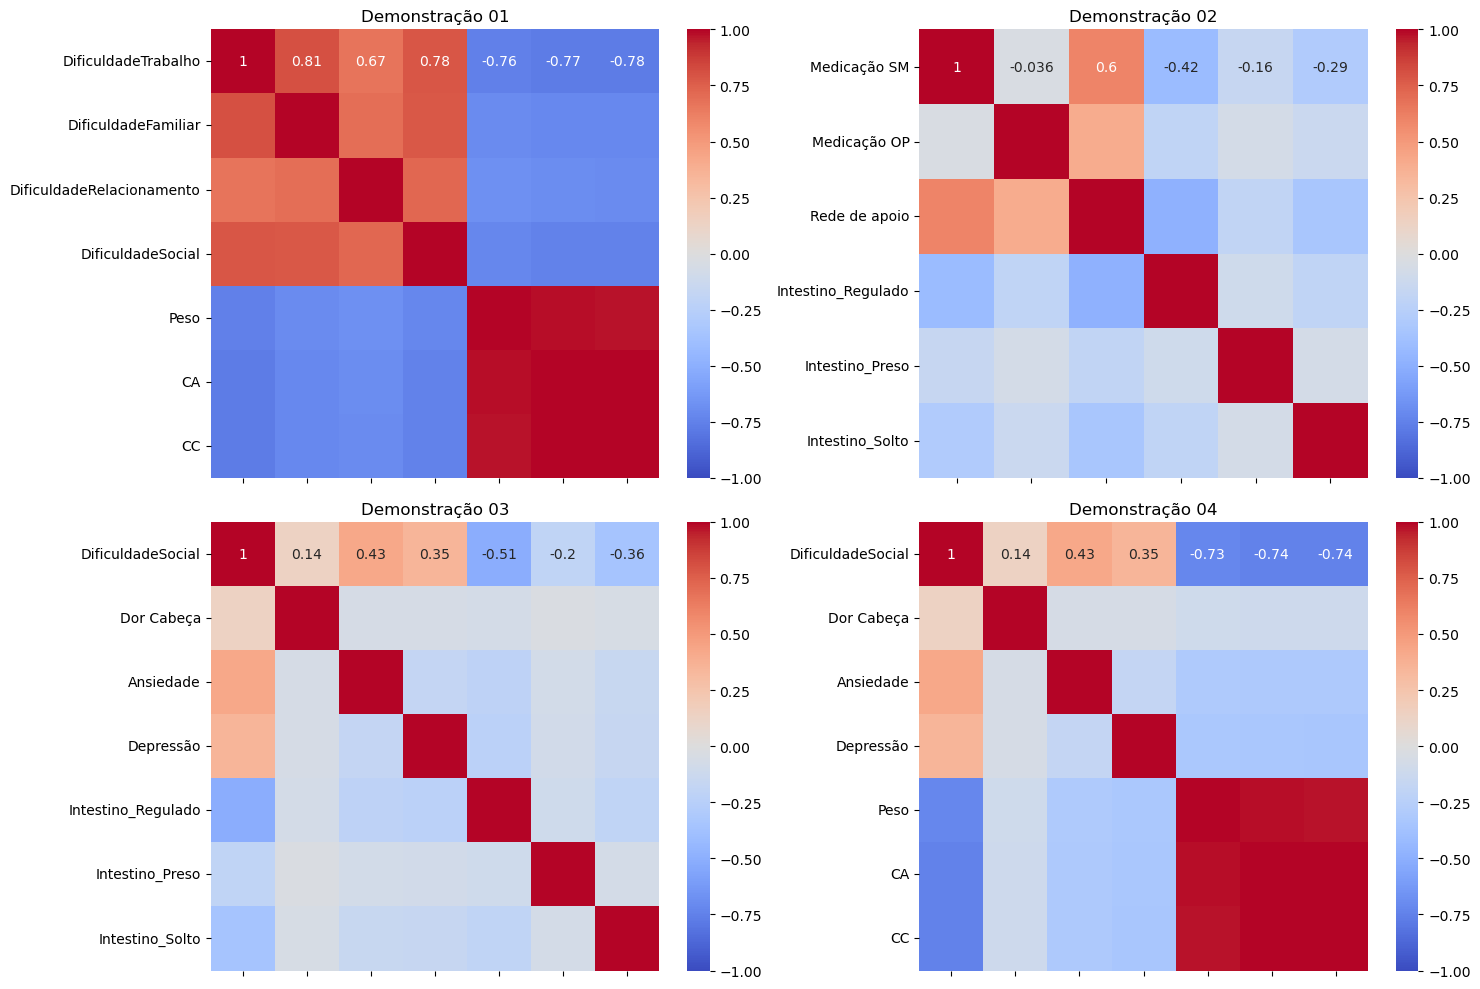

In [36]:
# Heatmaps

demonstracao_01 = df_merged_corr[['DificuldadeTrabalho','DificuldadeFamiliar', 'DificuldadeRelacionamento', 'DificuldadeSocial','Peso','CA','CC']]
demonstracao_02 = df_merged_corr[['Medicação SM', 'Medicação OP','Rede de apoio', 'Intestino_Regulado', 'Intestino_Preso','Intestino_Solto']]
demonstracao_03 = df_merged_corr[['DificuldadeSocial','Dor Cabeça', 'Ansiedade','Depressão', 'Intestino_Regulado','Intestino_Preso','Intestino_Solto']]
demonstracao_04 = df_merged_corr[['DificuldadeSocial','Dor Cabeça', 'Ansiedade','Depressão', 'Peso','CA','CC']]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))


ax1 = sns.heatmap(demonstracao_01.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0, 0])
ax1.set_title('Demonstração 01')
ax1.set_xticklabels([])


ax2 = sns.heatmap(demonstracao_02.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0, 1])
ax2.set_title('Demonstração 02')
ax2.set_xticklabels([])


ax3 = sns.heatmap(demonstracao_03.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1, 0])
ax3.set_title('Demonstração 03')
ax3.set_xticklabels([])


ax4 = sns.heatmap(demonstracao_04.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[1, 1])
ax4.set_title('Demonstração 04')
ax4.set_xticklabels([])


plt.tight_layout()
plt.show()

-----------------------------------------------------------------------------------------

Em cada exemplo analisado, foram utilizadas três variáveis relacionadas a problemas nutricionais e três variáveis relacionadas a problemas psicológicos. Observou-se que as variáveis dentro da mesma categoria (Nutri ou Psic) apresentaram uma correlação relativamente forte, com valores acima de 0. Por outro lado, as correlações entre variáveis de bases diferentes mostraram-se relativamente fracas, com valores abaixo de 0. Esta observação sugere que há uma associação mais significativa entre as variáveis que compartilham a mesma natureza (nutricional ou psicológica), indicando possíveis interdependências dentro desses contextos específicos de saúde.

Em resumo, a análise preliminar  mostra que há uma falta significativa de dados para estabelecer correlações claras entre problemas nutricionais e psicológicos nos pacientes estudados. A coleta de mais dados e a aplicação de técnicas de análise mais robustas são essenciais para avançar neste estudo.

Apesar disto vamos tentar realizar algumas operações tradicionais e fazer algumas analises específicas para cada Base de dados.

In [37]:
# Análise descritiva Todos os dados

df_merged_corr.describe().round(2)

,Altura,Patologias Crônicas,Medicação SM,Medicação OP,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial,Dor Cabeça,Ansiedade,Depressão,Insônia,Fobia,Pânico,Abuso Subs,Borderline,Estresse,Analgésico,Psicoterapia,Antidepressivo,Hipnótico,TerapiaComportamental,Aconselhamento Nutri,Internação,TCC,Medicação,Nenhum Procedimento,Dif. Familiar,Dif. Consigo,Dif. Saúde,Dif. Financeiro,Dif. Rel. Conj.,Dif. Fam/Conju,Dif. Int. Soc/Trabalho,Peso,CA,CC,Fome_Emocional,Sono,Intestino_Regulado,Intestino_Preso,Intestino_Solto,AF_Zero,AF_1_2,AF_3_4,AF_1_3,AF_5+,AF_Diario_1,AF_Diario_2+,Fruta_Nunca,Fruta_1_3,Fruta_4_6,Fruta_Diario_1,Fruta_Diario_2+,Verdura_Nunca,Verdura_1_3,Verdura_4_6,Verdura_Diario_1,Verdura_Diario_2+,Ultra_Nunca,Ultra_1_3,Ultra_4_6,Ultra_Diario_1,Ultra_Diario_2+,Doce_Nunca,Doce_1_3,Doce_4_6,Doce_Diario_1,Doce_Diario_2+,Realiza_AF
count,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.00,50.00,50.0,50.0,50.0,50.0,50.00,50.00,50.00,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.00,50.0,50.0,50.00
mean,172.38,0.06,0.38,0.12,0.46,2.14,1.44,1.06,1.50,0.02,0.14,0.16,0.02,0.02,0.06,0.02,0.02,0.08,0.02,0.18,0.04,0.02,0.02,0.02,0.02,0.12,0.06,0.04,0.0,0.04,0.04,0.0,0.0,0.0,0.0,29.28,34.66,33.68,0.2,0.06,0.22,0.04,0.12,0.04,0.16,0.06,0.02,0.06,0.0,0.04,0.04,0.18,0.06,0.06,0.04,0.04,0.18,0.06,0.06,0.04,0.06,0.16,0.06,0.06,0.04,0.06,0.16,0.06,0.1,0.0,0.34
std,6.90,0.24,0.49,0.33,0.50,2.15,1.57,1.19,1.57,0.14,0.35,0.37,0.14,0.14,0.24,0.14,0.14,0.27,0.14,0.39,0.20,0.14,0.14,0.14,0.14,0.33,0.24,0.20,0.0,0.20,0.20,0.0,0.0,0.0,0.0,39.35,45.52,44.14,0.4,0.24,0.42,0.20,0.33,0.20,0.37,0.24,0.14,0.24,0.0,0.20,0.20,0.39,0.24,0.24,0.20,0.20,0.39,0.24,0.24,0.20,0.24,0.37,0.24,0.24,0.20,0.24,0.37,0.24,0.3,0.0,0.48
min,160.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
25%,167.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
50%,171.00,0.00,0.00,0.00,0.00,2.00,1.00,1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00
75%,178.00,0.00,1.00,0.00,1.00,4.00,2.75,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,68.75,86.50,84.25,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.00
max,186.00,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0,120.00,140.00,130.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,0.0,1.00


Na introdução da seção de Análise, mencionamos que os dados apresentavam lacunas, o que levou à imputação de valores que não correspondem necessariamente à realidade esperada. Como resultado, a análise descritiva numérica realizada não revelou nenhum ponto destacável ou significativo.

Único dado que vejo que trás uma relevância é os dados de altura, que podem ser utilizados na análise de problemas nutricionais.

In [38]:
# Análise descritiva Nutri

df_corr_nutri.describe().round(2)

,Peso,CA,CC,Fome_Emocional,Sono,Intestino_Regulado,Intestino_Preso,Intestino_Solto,AF_Zero,AF_1_2,AF_3_4,AF_1_3,AF_5+,AF_Diario_1,AF_Diario_2+,Fruta_Nunca,Fruta_1_3,Fruta_4_6,Fruta_Diario_1,Fruta_Diario_2+,Verdura_Nunca,Verdura_1_3,Verdura_4_6,Verdura_Diario_1,Verdura_Diario_2+,Ultra_Nunca,Ultra_1_3,Ultra_4_6,Ultra_Diario_1,Ultra_Diario_2+,Doce_Nunca,Doce_1_3,Doce_4_6,Doce_Diario_1,Doce_Diario_2+,Realiza_AF
count,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.0,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00,22.00
mean,78.36,95.59,90.18,0.55,0.14,0.50,0.18,0.32,0.09,0.45,0.18,0.05,0.14,0.0,0.09,0.14,0.50,0.14,0.14,0.09,0.09,0.55,0.14,0.14,0.09,0.14,0.36,0.27,0.14,0.09,0.14,0.36,0.14,0.23,0.14,0.91
std,17.23,17.82,13.93,0.51,0.35,0.51,0.39,0.48,0.29,0.51,0.39,0.21,0.35,0.0,0.29,0.35,0.51,0.35,0.35,0.29,0.29,0.51,0.35,0.35,0.29,0.35,0.49,0.46,0.35,0.29,0.35,0.49,0.35,0.43,0.35,0.29
min,58.00,75.00,70.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,66.25,85.50,80.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
50%,75.00,90.00,88.50,1.00,0.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.50,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
75%,88.75,98.75,95.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.75,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,120.00,140.00,130.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


Na análise descritiva numérica de problemas nutricionais, diversos fatores emergem como relevantes. Inicialmente, o peso médio dos pacientes, que é de 78.36 kg, e a altura média de 172 cm são observados. Surpreendentemente, apesar das médias indicarem que a obesidade não deveria ser tão comum, a análise descritiva categórica revela uma frequência significativa dessa condição. Isso levanta a possibilidade de existirem casos de "falsos positivos", ou seja, indivíduos classificados como obesos pela análise, mas que possam não ser.

Outro aspecto relevante é o baixo nível de atividades físicas diárias ou semanais, conforme indicado pela coluna Realiza_AF. Isso sugere que, embora as pessoas possam praticar atividades físicas, a regularidade é baixa. Notavelmente, a categoria AF_1_2 apresenta a maior média, indicando que a maioria das pessoas realiza atividades físicas apenas uma ou duas vezes por semana. Uma análise mais aprofundada desses padrões pode fornecer insights adicionais sobre os hábitos de atividade física e sua relação com problemas nutricionais.

In [39]:
# Desvendando teoria hipotese acima de que existem pessoas "Falso Obesas"

df_obesidade = df_paciente_nutri[df_paciente_nutri['Sintoma_Principal'] == 'Obesidade']

df_obesidade

,id_paciente,Altura,Sexo,Idade,Peso,Sintoma_Principal,IMC,Interpretacao_IMC
0,Jane Doe 15,1.68,Feminino,30,58,Obesidade,20.549887,Peso normal
3,Jane Doe 16,1.68,Feminino,29,62,Obesidade,21.967120,Peso normal
4,John Doe 20,1.83,Masculino,42,120,Obesidade,35.832661,Obesidade
10,Jane Doe 19,1.64,Feminino,25,120,Obesidade,44.616300,Obesidade
14,Jane Doe 21,1.73,Feminino,32,65,Obesidade,21.718066,Peso normal
17,John Doe 27,1.76,Masculino,35,93,Obesidade,30.023244,Obesidade


A tabela acima mostra que há pacientes que mencionam a obesidade como sintoma principal, mas, ao calcularmos o IMC, eles não se enquadram nessa condição. Esse cenário é frequente e pode gerar impactos psicológicos significativos em relação ao peso, levando ao imaginário de estarem "gordos", apesar de terem um peso corporal considerado normal e saudável.

In [40]:
# Análise descritiva Pisc

df_corr_psico.describe().round(2)

,Comparecimento,Medicação SM,Medicação OP,Rede de apoio,DificuldadeTrabalho,DificuldadeFamiliar,DificuldadeRelacionamento,DificuldadeSocial,Dor Cabeça,Ansiedade,Depressão,Insônia,Fobia,Pânico,Abuso Subs,Borderline,Estresse,Analgésico,Psicoterapia,Antidepressivo,Hipnótico,TerapiaComportamental,Aconselhamento Nutri,Internação,TCC,Medicação,Nenhum Procedimento,Dif. Familiar,Dif. Consigo,Dif. Saúde,Dif. Financeiro,Dif. Rel. Conj.,Dif. Fam/Conju,Dif. Int. Soc/Trabalho
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.0,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.0,30.00,30.00,30.0,30.0,30.0,30.0
mean,0.97,0.73,0.23,0.83,3.97,2.80,2.17,2.90,0.03,0.33,0.27,0.03,0.03,0.10,0.03,0.03,0.13,0.03,0.4,0.07,0.03,0.03,0.03,0.03,0.20,0.10,0.07,0.0,0.07,0.07,0.0,0.0,0.0,0.0
std,0.18,0.45,0.43,0.38,1.13,1.21,1.15,1.09,0.18,0.48,0.45,0.18,0.18,0.31,0.18,0.18,0.35,0.18,0.5,0.25,0.18,0.18,0.18,0.18,0.41,0.31,0.25,0.0,0.25,0.25,0.0,0.0,0.0,0.0
min,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
25%,1.00,0.25,0.00,1.00,3.25,2.00,1.25,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
50%,1.00,1.00,0.00,1.00,4.00,2.50,2.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
75%,1.00,1.00,0.00,1.00,5.00,3.75,2.00,4.00,0.00,1.00,0.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0
max,1.00,1.00,1.00,1.00,5.00,5.00,5.00,5.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.0,1.00,1.00,0.0,0.0,0.0,0.0


Na análise descritiva numérica dos problemas psicológicos, observamos que o uso predominante de medicamentos sintomáticos sugere que muitos desses problemas têm uma duração breve e são tratados eficientemente dessa forma. Além disso, ao considerar os dados, notamos que o primeiro quartil dos pacientes indica uma considerável associação entre problemas psicológicos e questões relacionadas ao trabalho, sugerindo que uma minoria dos pacientes atribui uma pontuação "Alta" aos problemas relacionados ao trabalho como causa de seus problemas psicológicos.

Quanto às doenças específicas, a ansiedade e a depressão emergem como os problemas psicológicos mais prevalentes neste conjunto de dados, enquanto outras condições têm uma relevância significativamente menor.

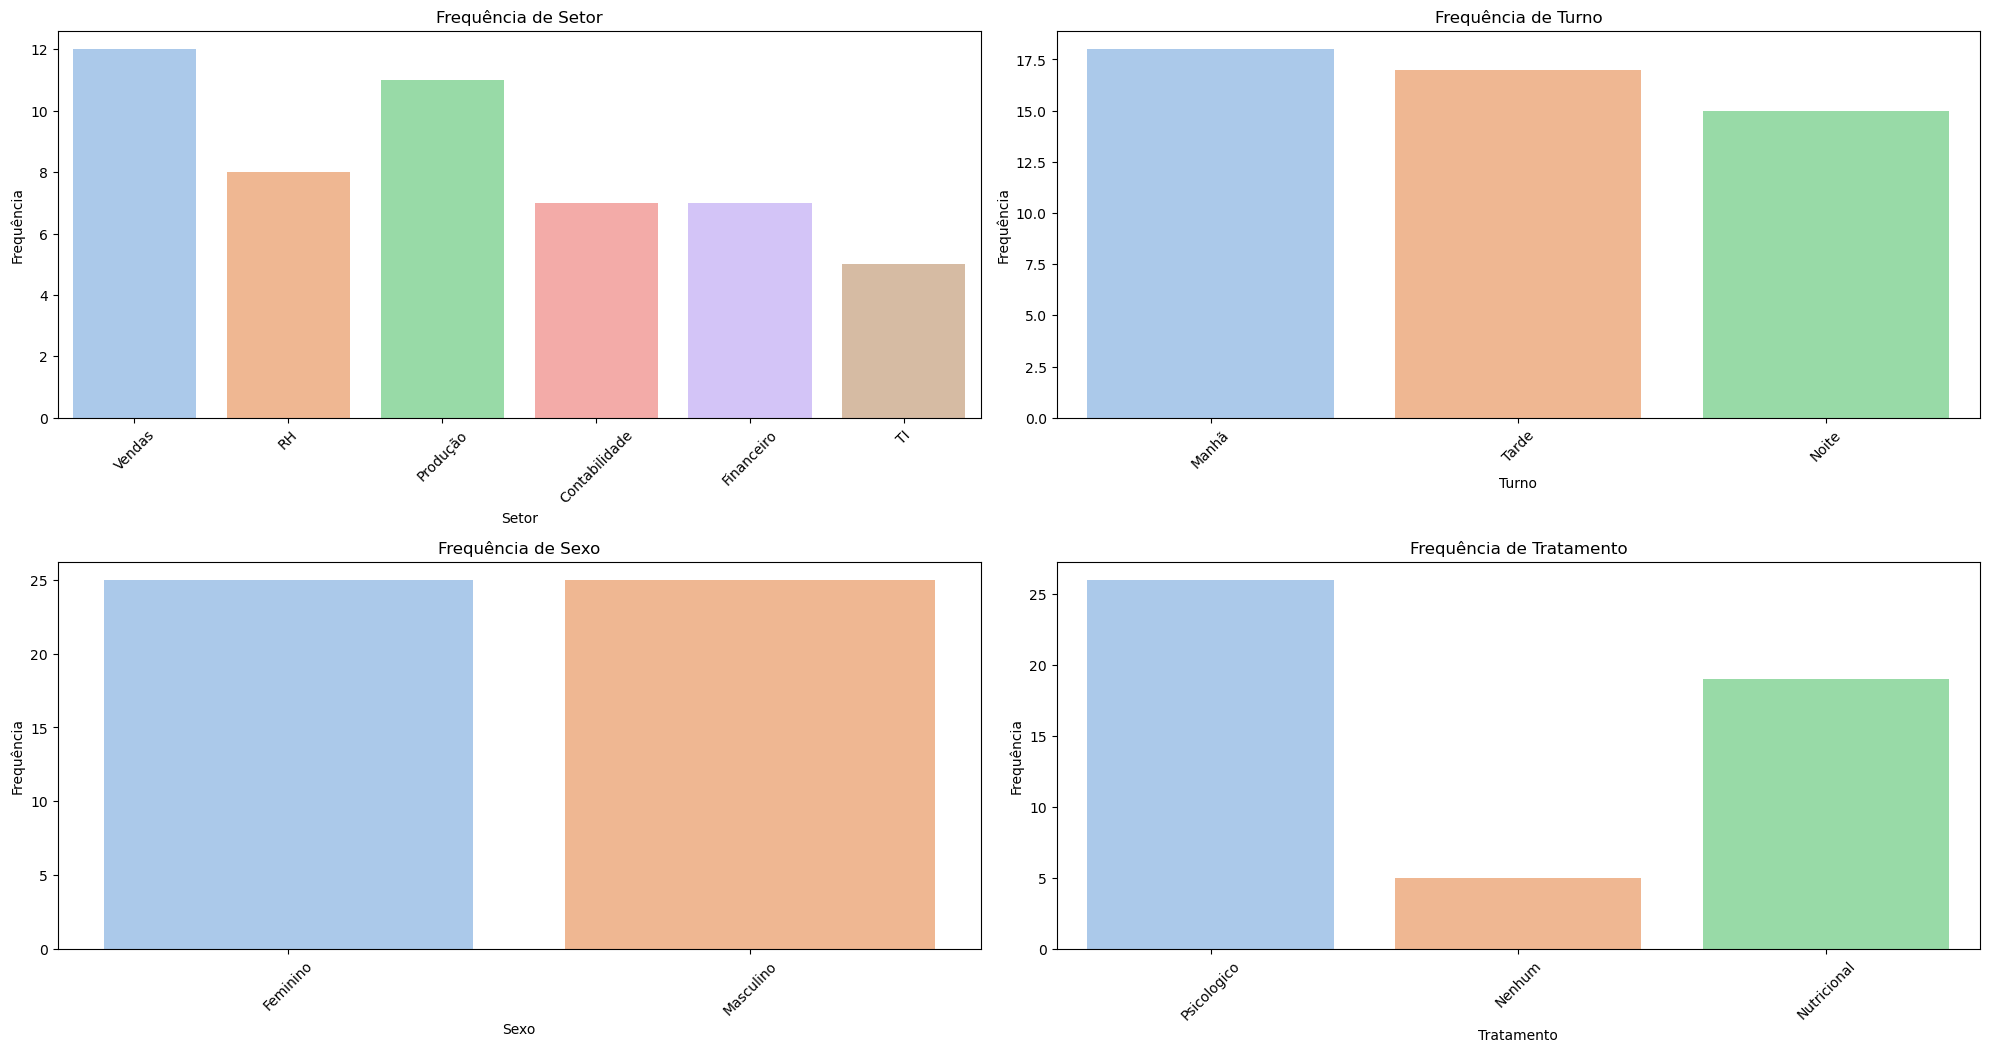

In [41]:
# Gráficos de Setor, Turno, Sexo e Tratamento

colunas_para_remover = df_merged_corr.columns.tolist()
df_resultado = df_merged.drop(columns=colunas_para_remover)
df_resultado = df_resultado[['Setor','Função','Turno','Sexo','Tratamento','Doenças']]

colunas_para_plotar = ['Setor','Turno','Sexo','Tratamento']

plt.figure(figsize=(20, 15))


for i, coluna in enumerate(colunas_para_plotar, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df_resultado, x=coluna, palette='pastel')
    plt.title(f'Frequência de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.tight_layout()
plt.show()

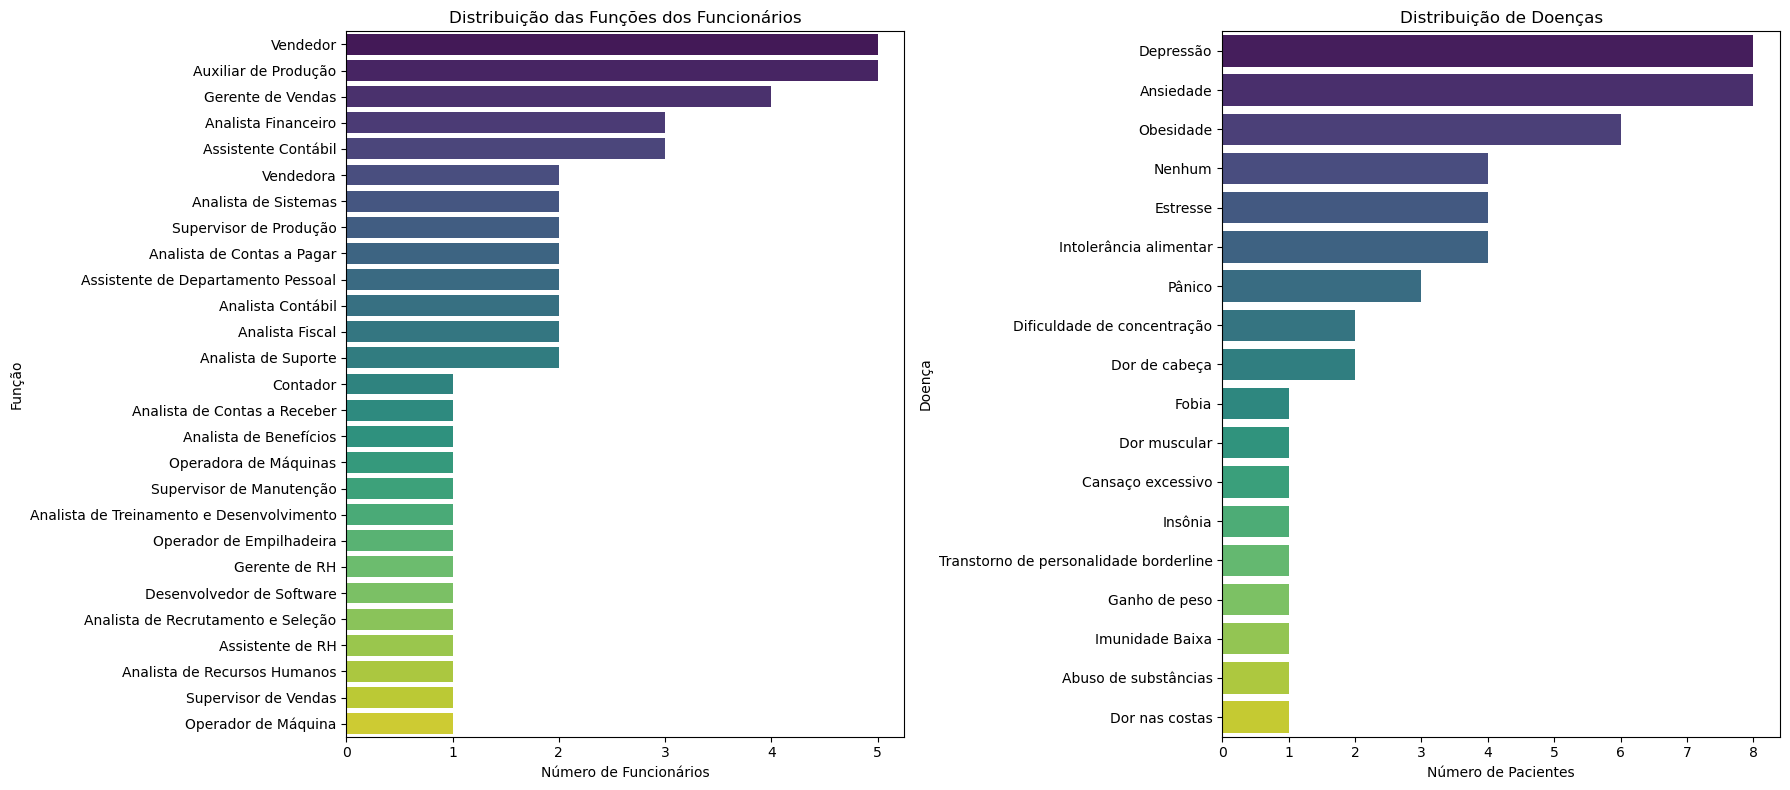

In [42]:
# Gráfico distribuição de funções e Doenças

df_contagem_funcoes = df_resultado['Função'].value_counts().reset_index()
df_contagem_funcoes.columns = ['Função', 'Contagem']

df_contagem_funcoes = df_contagem_funcoes.sort_values(by='Contagem', ascending=False)

df_contagem_doencas = df_resultado['Doenças'].value_counts().reset_index()
df_contagem_doencas.columns = ['Doenças', 'Contagem']

df_contagem_doencas = df_contagem_doencas.sort_values(by='Contagem', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.barplot(ax=axes[0], x='Contagem', y='Função', data=df_contagem_funcoes, palette='viridis')
axes[0].set_title('Distribuição das Funções dos Funcionários')
axes[0].set_xlabel('Número de Funcionários')
axes[0].set_ylabel('Função')

sns.barplot(ax=axes[1], x='Contagem', y='Doenças', data=df_contagem_doencas, palette='viridis')
axes[1].set_title('Distribuição de Doenças')
axes[1].set_xlabel('Número de Pacientes')
axes[1].set_ylabel('Doença')

plt.tight_layout()

plt.show()

Ao analisar os gráficos, podemos observar que problemas psicológicos, como depressão, estão mais evidentes do que as doenças nutricionais. No entanto, é crucial notar que há mais dados disponíveis para problemas psicológicos do que para problemas nutricionais, o que naturalmente eleva os números relacionados a esses transtornos. Além disso, a distribuição igualitária entre os sexos dos pacientes, com 25 homens e 25 mulheres, sugere que uma análise exploratória para identificar as doenças prevalentes em cada sexo seria pertinente.

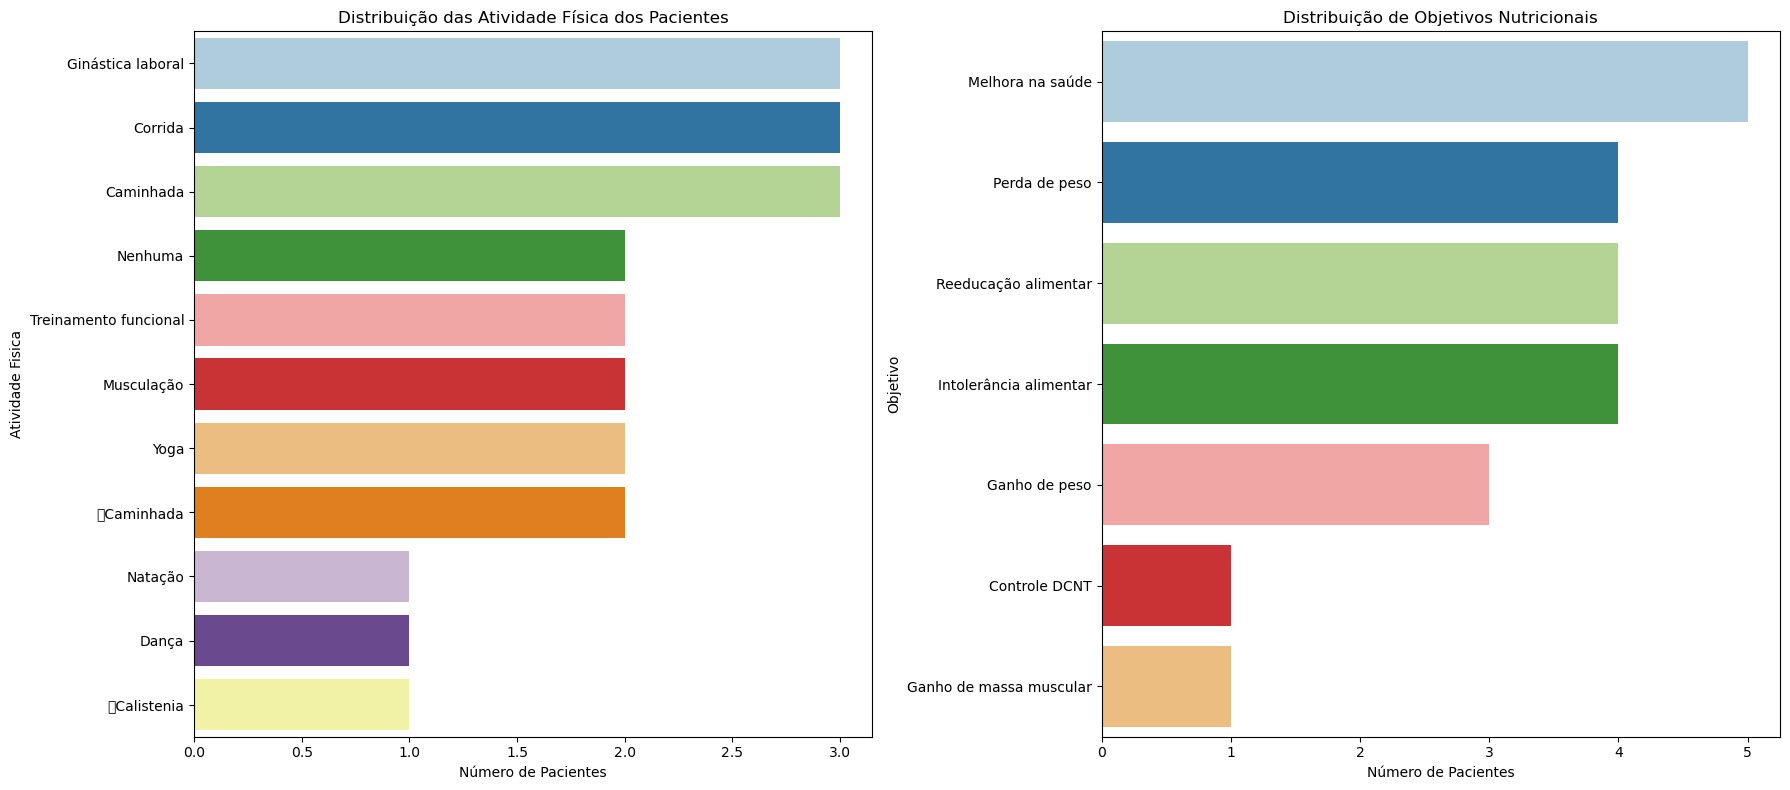

In [43]:
# Gráfico Atividade Fisica e Objetivo

df_contagem_AF = df_nutri_01['Atividade_Fisica'].value_counts().reset_index()
df_contagem_AF.columns = ['Atividade_Fisica', 'Contagem']

df_contagem_AF = df_contagem_AF.sort_values(by='Contagem', ascending=False)

df_contagem_doencas = df_nutri_01['Objetivo'].value_counts().reset_index()
df_contagem_doencas.columns = ['Objetivo', 'Contagem']

df_contagem_doencas = df_contagem_doencas.sort_values(by='Contagem', ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

sns.barplot(ax=axes[0], x='Contagem', y='Atividade_Fisica', data=df_contagem_AF, palette='Paired')
axes[0].set_title('Distribuição das Atividade Física dos Pacientes')
axes[0].set_xlabel('Número de Pacientes')
axes[0].set_ylabel('Atividade Fisica')

sns.barplot(ax=axes[1], x='Contagem', y='Objetivo', data=df_contagem_doencas, palette='Paired')
axes[1].set_title('Distribuição de Objetivos Nutricionais')
axes[1].set_xlabel('Número de Pacientes')
axes[1].set_ylabel('Objetivo')

plt.tight_layout()

plt.show()

O gráfico atual representa a distribuição da atividade física em relação aos objetivos nutricionais. Nota-se que o objetivo predominante é a melhoria da saúde, uma categoria bastante ampla que não oferece muitos insights específicos. No entanto, podemos destacar que tanto a perda de peso quanto a reeducação alimentar têm uma relevância significativa. Além disso, ao examinar as principais atividades físicas, nota-se que estão diretamente ligadas à perda de peso, sendo predominantemente atividades cardiovasculares.

Em relação aos dados piscicológicos não encontrei alguma ADC relevante, maioria já foi tratada nas ADN.

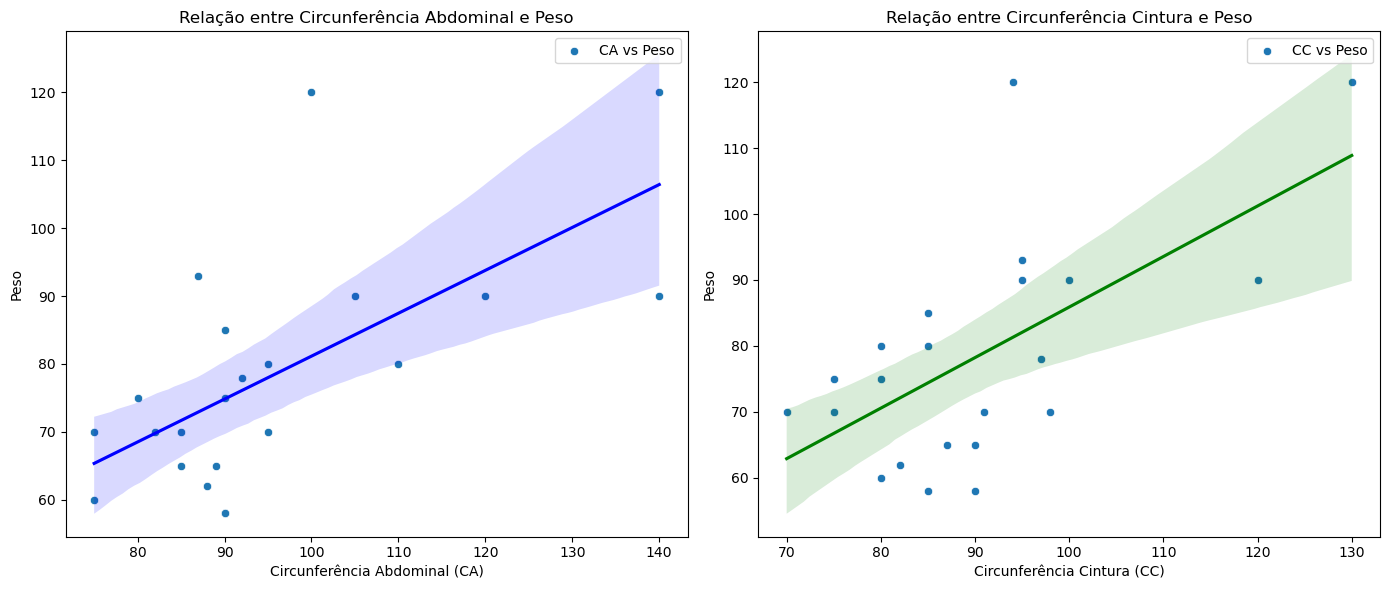

In [44]:
# Graficos CC x Peso e CA x Peso

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))


sns.scatterplot(data=df_corr_nutri, x='CA', y='Peso', label='CA vs Peso', ax=ax1)
sns.regplot(data=df_corr_nutri, x='CA', y='Peso', scatter=False, color='blue', ax=ax1)
ax1.set_title('Relação entre Circunferência Abdominal e Peso')
ax1.set_xlabel('Circunferência Abdominal (CA)')
ax1.set_ylabel('Peso')
ax1.legend()


sns.scatterplot(data=df_corr_nutri, x='CC', y='Peso', label='CC vs Peso', ax=ax2)
sns.regplot(data=df_corr_nutri, x='CC', y='Peso', scatter=False, color='green', ax=ax2)
ax2.set_title('Relação entre Circunferência Cintura e Peso')
ax2.set_xlabel('Circunferência Cintura (CC)')
ax2.set_ylabel('Peso')
ax2.legend()

plt.tight_layout()
plt.show()

O gráfico acima ilustra a relação entre as variáveis CA, CC e peso. Ele demonstra uma correlação positiva, evidenciada pela linha de tendência ascendente. Isso indica que, à medida que as circunferências aumentam, o peso também tende a subir.

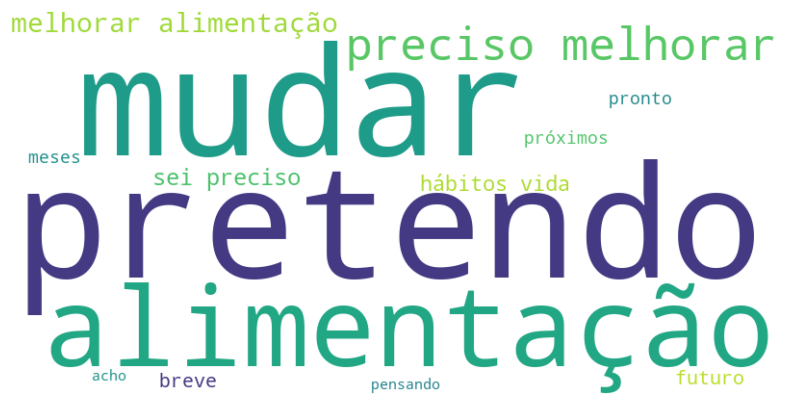

In [45]:
# Criando um wordcloud para entender quais são as palavras mais utilizadas no estagio

texto_completo = ' '.join(df_nutri_01['Estagio'])

tokens = word_tokenize(texto_completo, language='portuguese')

stop_words = set(stopwords.words('portuguese'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Ao utilizar um wordcloud, podemos observar que as palavras mais frequentemente mencionadas pelos pacientes são "Mudar" e "Pretendo", destacadas pelo tamanho maior na nuvem de palavras. Isso sugere que a maioria dos pacientes expressa um desejo de realizar mudanças e tem planos futuros para melhorar sua condição atual. Esse tipo de análise ajuda a identificar temas predominantes nos relatos dos pacientes, oferecendo insights sobre suas intenções e motivações em relação ao tratamento ou mudança de hábitos.

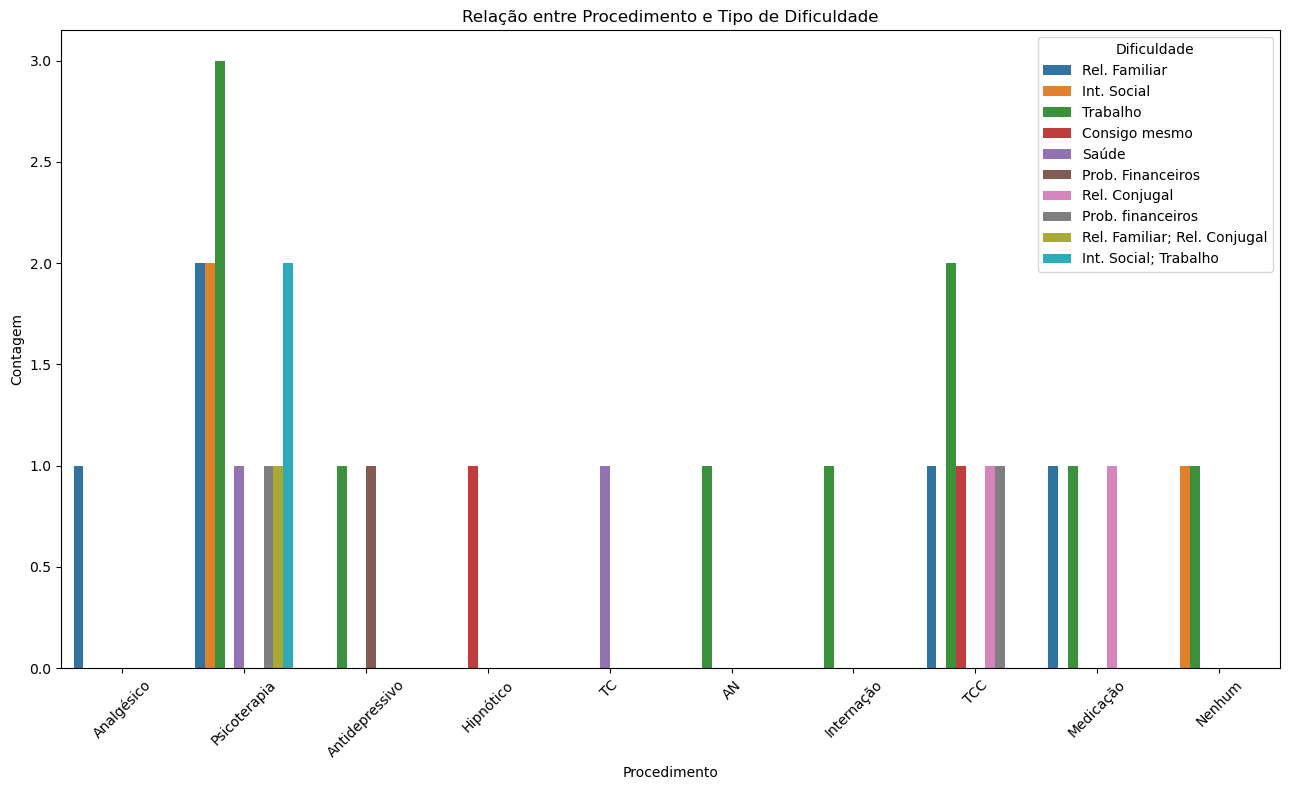

In [46]:
# Grafico identificando quais os procedimentos mais utilizados dependendo do tipo de dificuldade

plt.figure(figsize=(13, 8))
sns.countplot(x='Procedimento', hue='Dificuldade', data=df_psico_02)
plt.title('Relação entre Procedimento e Tipo de Dificuldade')
plt.xlabel('Procedimento')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Dificuldade')
plt.tight_layout()
plt.show()

O gráfico revela que o trabalho é a dificuldade mais tratada em todos os procedimentos, sugerindo sua prevalência entre os pacientes. Além disso, a psicoterapia é o procedimento mais comum, aplicado em todas as dificuldades mencionadas pelos pacientes. A Terapia Cognitivo-Comportamental se destaca, particularmente no tratamento das dificuldades relacionadas ao trabalho, indicando que questões emocionais podem estar significativamente impactando os pacientes nesse contexto específico.

# Interpretação

Ao analisar os dados, observa-se que não há uma correlação evidente entre problemas nutricionais e psicológicos devido à insuficiência de dados em ambos os grupos, tornando qualquer relação potencialmente especulativa. No entanto, alguns insights podem ser destacados.

Primeiramente, ao examinar o peso relatado em relação ao sintoma de obesidade, identifica-se que algumas pessoas se percebem como obesas sem realmente estarem nessa condição. Esse equívoco é comum e pode causar ansiedade devido à percepção errônea de imagem corporal. Além disso, a presença comum de ansiedade como sintoma em ambas as bases de dados sugere uma possível relação direta, pois distúrbios nutricionais como fome emocional e distúrbios de sono são frequentemente associados à ansiedade.

Em termos de tratamento, a psicoterapia é predominantemente utilizada, indicando uma inter-relação entre nutrição e saúde mental. Terapias como a Terapia Cognitivo-Comportamental (TCC) são frequentemente aplicadas para abordar comportamentos alimentares, padrões emocionais associados à alimentação e questões psicológicas que influenciam os hábitos alimentares. Isso é evidenciado pela ênfase na TCC para lidar com questões como fome emocional, compulsão alimentar e padrões de pensamento disfuncionais relacionados à comida.

Ao analisar o wordcloud, destaca-se a frequência de palavras como "melhorar", "preciso", "futuro" e "hábitos de vida", sugerindo que indivíduos buscando tratamento nutricional estão motivados a promover mudanças significativas em suas vidas. Essas aspirações podem estar intrinsicamente ligadas a desafios psicológicos relacionados à autoimagem e ao bem-estar geral.os de vida", isso indica que as pessoas que estão buscando tratamento nutricional estão buscando mudanças de vida e buscam melhorar sua condição física, o que pode estar atrelado a problemas psicologicos de autoidentificação.

No contexto das pessoas que afirmam praticar atividades físicas, os números reais revelam uma frequência relativamente baixa, geralmente de uma a duas vezes por semana. Esta disparidade pode indicar várias questões subjacentes, como falta de tempo, motivação ou disposição. Esses fatores podem estar profundamente interligados a problemas psicológicos, especialmente considerando o elevado número de pessoas que relatam dificuldades no trabalho. A dificuldade no trabalho frequentemente se associa à escassez de tempo e energia para outras atividades, incluindo exercícios físicos regulares.

Portanto, os dados analisados revelam um cenário complexo onde as relações entre problemas nutricionais e psicológicos não são claramente estabelecidas devido à falta de dados suficientes em ambos os grupos. No entanto, destaca-se a percepção equivocada de obesidade por parte de alguns indivíduos, influenciando negativamente sua saúde mental. A presença comum de ansiedade em ambos os conjuntos de dados sugere uma possível interligação, especialmente com distúrbios nutricionais como fome emocional e problemas de sono. A predominância da Terapia Cognitivo-Comportamental no tratamento indica uma abordagem integrada entre nutrição e saúde mental, focando em comportamentos alimentares e questões psicológicas associadas. A motivação para mudanças positivas, evidenciada pelo wordcloud, reflete aspirações ligadas à autoimagem e bem-estar geral, apesar das dificuldades percebidas na prática regular de atividades físicas, influenciadas por desafios psicológicos como a falta de tempo e energia relacionada ao trabalho.

# Limitações

Com base na interpretação dos dados, observou-se que as bases de dados não apresentam correlações significativas entre si, o que limita a identificação de padrões diretos. Isso implica na necessidade de utilizar especulação como uma ferramenta para explorar possíveis relações entre elas. Apesar dessa limitação, foram identificadas algumas associações com os dados disponíveis.

É crucial notar que há apenas uma amostra que conecta diretamente as tabelas, o que restringe os cálculos estatísticos e de previsão. Utilizar essa amostra como objeto de estudo poderia resultar em overfitting, introduzindo um viés em torno desse paciente específico.

Para avançar, recomenda-se uma coleta mais abrangente de dados, especialmente de pacientes com problemas psicológicos e nutricionais. Isso permitiria a aplicação de métodos avançados como clusterização e aprendizado de máquina, facilitando previsões mais precisas e agrupamentos mais eficazes. Além disso, padronizar os dados em todas as bases, incluindo nomes e datas, é essencial. Também é aconselhável revisar e possivelmente eliminar colunas que não contribuem com informações relevantes para análise.

Dado que nutrição e psicologia envolvem uma variedade extensa de variáveis, é válido buscar mais dados que abranjam ambas as áreas. Isso poderia incluir indivíduos sem vínculos trabalhistas específicos e ampliar a faixa etária, aumentando assim a diversidade e a qualidade dos dados. Essas medidas poderiam proporcionar insights mais robustos sobre pessoas que enfrentam desafios diferentes daqueles vinculados ao ambiente corporativo. 